# **MINIPROJECT NOTEBOOK**

# data collection 

1. we sourced the data from kaggle the data contained congestion , traffic direction, and X y location 

2. we used only the congestion to train the model we used LSTM , GRU and RNN to see which is best

# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math 
from sklearn.metrics import mean_squared_error

# Functions for later to plot predictions and calculate RMSE

In [2]:
def plot_pred(test, pred):
    plt.plot(test, color='red', label='Real Congestion')
    plt.plot(pred, color='blue', label='Predicted Congestion')
    plt.title('car Congestion')
    plt.xlabel('Time')
    plt.ylabel('car Congetion')
    plt.legend()
    plt.show()

def return_rmse(test,pred):
    rmse = math.sqrt(mean_squared_error(test, pred))
    print("The root mean squared error is {}.".format(rmse))

# read data

In [3]:
df = pd.read_csv('D:\\Tuwaiq Academy\\Tuwaiq_Academy_T5_Week_5\\Week 5 Mini Project\\Datasets\Train.csv')
df

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60
...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17


what are the datatypes ?

In [4]:
df.dtypes

row_id         int64
time          object
x              int64
y              int64
direction     object
congestion     int64
dtype: object

In [5]:
df.shape

(848835, 6)

turn time to datetime

In [6]:
df['time'] = pd.to_datetime(df['time'])
df.dtypes

row_id                 int64
time          datetime64[ns]
x                      int64
y                      int64
direction             object
congestion             int64
dtype: object

get day from time

In [7]:
df['day'] = df['time'].dt.day
df

,row_id,time,x,y,direction,congestion,day
0,0,1991-04-01 00:00:00,0,0,EB,70,1
1,1,1991-04-01 00:00:00,0,0,NB,49,1
2,2,1991-04-01 00:00:00,0,0,SB,24,1
3,3,1991-04-01 00:00:00,0,1,EB,18,1
4,4,1991-04-01 00:00:00,0,1,NB,60,1
...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54,30
848831,848831,1991-09-30 11:40:00,2,3,NE,28,30
848832,848832,1991-09-30 11:40:00,2,3,SB,68,30
848833,848833,1991-09-30 11:40:00,2,3,SW,17,30


drop row-id we don't need it

In [8]:
df.drop('row_id', axis=1, inplace=True)
df

,time,x,y,direction,congestion,day
0,1991-04-01 00:00:00,0,0,EB,70,1
1,1991-04-01 00:00:00,0,0,NB,49,1
2,1991-04-01 00:00:00,0,0,SB,24,1
3,1991-04-01 00:00:00,0,1,EB,18,1
4,1991-04-01 00:00:00,0,1,NB,60,1
...,...,...,...,...,...,...
848830,1991-09-30 11:40:00,2,3,NB,54,30
848831,1991-09-30 11:40:00,2,3,NE,28,30
848832,1991-09-30 11:40:00,2,3,SB,68,30
848833,1991-09-30 11:40:00,2,3,SW,17,30


here I want to see which direction has the most congestion

In [9]:
group_dic = df.groupby(['direction']).agg({'congestion': 'mean'})
group_dic

,congestion
direction,
EB,49.571171
NB,51.853913
NE,39.971251
NW,27.188912
SB,53.716332
SE,34.859637
SW,42.019538
WB,49.842289


looks like we'll go with southbound driection

the next cell I took only the data related to SB

In [10]:
df = df[df['direction'] == 'SB']
df

,time,x,y,direction,congestion,day
2,1991-04-01 00:00:00,0,0,SB,24,1
5,1991-04-01 00:00:00,0,1,SB,58,1
9,1991-04-01 00:00:00,0,2,SB,46,1
14,1991-04-01 00:00:00,0,3,SB,49,1
20,1991-04-01 00:00:00,1,0,SB,44,1
...,...,...,...,...,...,...
848806,1991-09-30 11:40:00,1,3,SB,66,30
848811,1991-09-30 11:40:00,2,0,SB,45,30
848817,1991-09-30 11:40:00,2,1,SB,37,30
848825,1991-09-30 11:40:00,2,2,SB,64,30


now drop x y and direction we don't need them anymore 

In [11]:
df.drop(['x','y','direction'],axis=1, inplace=True)
df

C:\Users\abo_O\AppData\Local\Temp\ipykernel_13448\716129739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['x','y','direction'],axis=1, inplace=True)


,time,congestion,day
2,1991-04-01 00:00:00,24,1
5,1991-04-01 00:00:00,58,1
9,1991-04-01 00:00:00,46,1
14,1991-04-01 00:00:00,49,1
20,1991-04-01 00:00:00,44,1
...,...,...,...
848806,1991-09-30 11:40:00,66,30
848811,1991-09-30 11:40:00,45,30
848817,1991-09-30 11:40:00,37,30
848825,1991-09-30 11:40:00,64,30


here I want to take the month and the hours to group the data 

In [12]:
df['month'] = df['time'].dt.month
df['hour'] = df['time'].dt.hour
df

C:\Users\abo_O\AppData\Local\Temp\ipykernel_13448\3052242136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['time'].dt.month
C:\Users\abo_O\AppData\Local\Temp\ipykernel_13448\3052242136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['time'].dt.hour


,time,congestion,day,month,hour
2,1991-04-01 00:00:00,24,1,4,0
5,1991-04-01 00:00:00,58,1,4,0
9,1991-04-01 00:00:00,46,1,4,0
14,1991-04-01 00:00:00,49,1,4,0
20,1991-04-01 00:00:00,44,1,4,0
...,...,...,...,...,...
848806,1991-09-30 11:40:00,66,30,9,11
848811,1991-09-30 11:40:00,45,30,9,11
848817,1991-09-30 11:40:00,37,30,9,11
848825,1991-09-30 11:40:00,64,30,9,11


In [16]:
import datetime as dt
start=dt.datetime(1991,4,1)
end=dt.datetime(1991,6,30)

date_filtered_data = df[(df['time'] > start) & (df['time'] < end)]

In [18]:
df = date_filtered_data

we don't need time anymore 

In [19]:
df.drop('time', axis=1, inplace=True)

C:\Users\abo_O\AppData\Local\Temp\ipykernel_13448\2964713450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('time', axis=1, inplace=True)


group the data by the hour in each day to each month

In [20]:
n_df = df.groupby(['day', 'month', 'hour']).sum().reset_index()

# Display the result
n_df

,day,month,hour,congestion
0,1,4,0,1064
1,1,4,1,1755
2,1,4,2,2007
3,1,4,3,1471
4,1,4,4,1498
...,...,...,...,...
2151,31,5,19,1972
2152,31,5,20,2057
2153,31,5,21,1992
2154,31,5,22,1770


just wanted to see what is the output before changing it 

In [21]:
df = n_df

take the length of the dataframe and split by 80%

In [22]:
train_size = int(len(df) * 0.8)
train_size

1724

split the data to train and test

In [23]:
train = df[:train_size].iloc[:,3:4].values
test = df[train_size:].iloc[:,3:4].values

train.shape, test.shape, train

((1724, 1),
 (432, 1),
 array([[1064],
        [1755],
        [2007],
        ...,
        [1997],
        [1932],
        [1789]], dtype=int64))

plot time series and show train and testing data

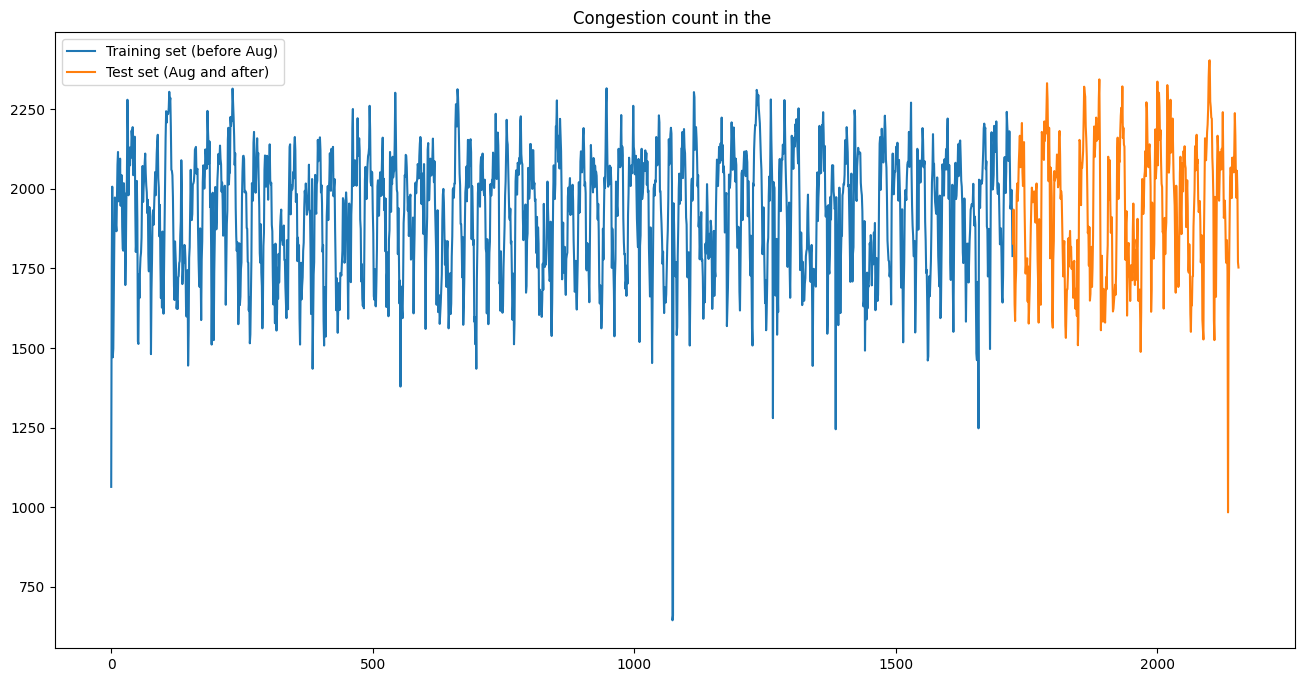

In [32]:
df['congestion'][:train_size].plot(figsize=(16,8), legend=True)
df['congestion'][train_size:].plot(figsize=(16,8), legend=True)
plt.legend(['Training set (before Aug)', 'Test set (Aug and after)'])
plt.title('Congestion count in the ')
plt.show()

In [25]:
df.dtypes

day           int32
month         int32
hour          int32
congestion    int64
dtype: object

scale training data

In [26]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)

In [27]:
len(train_scaled)

1724

split the training data into X and y 

In [28]:
X_train = []
y_train = []
for i in range(7,len(train_scaled)):
    X_train.append(train_scaled[i-7:i,0])
    y_train.append(train_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

reshape data

In [29]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# **LSTM MODEL**

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1),
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

train model

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

make predictions with LSTM model

In [ ]:
dataset_total = pd.concat((df["congestion"][:train_size], df["congestion"][train_size:]), axis=0)
inputs = dataset_total[len(dataset_total)-len(test)-7:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [ ]:
len(test)

# predict testing data

In [ ]:
X_test = []
for i in range(7,881):
    X_test.append(inputs[i-7:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_cong = model.predict(X_test)
pred_cong = scaler.inverse_transform(pred_cong)

plot real vs predicted data

In [ ]:
plot_pred(test, pred_cong)

ROOT MEAN SQUARED ERROR

In [ ]:
return_rmse(test, pred_cong)

# **GRU MODEL**

In [ ]:
RGRU = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dropout(0.2),
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dropout(0.2),
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dropout(0.2),
    GRU(50, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

RGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

RGRU.summary()

train model

In [ ]:
RGRU.fit(X_train, y_train, epochs=50, batch_size=64)

make predictions with GRU model

In [ ]:
X_test = []
for i in range(7,881):
    X_test.append(inputs[i-7:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_congestion = RGRU.predict(X_test)
GRU_predicted_dongestion = scaler.inverse_transform(GRU_predicted_congestion)

plot real vs predeicted data

In [ ]:
plot_pred(test, GRU_predicted_congestion)

ROOT MEAN SQUARED ERROR

In [ ]:
return_rmse(test, GRU_predicted_congestion)

# **RNN MODEL**

In [ ]:
df = pd.read_csv('D:\\Tuwaiq Academy\\Tuwaiq_Academy_T5_Week_5\\Week 5 Mini Project\\Datasets\Train.csv')
df

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df.dtypes

In [ ]:
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['hour'] = df['time'].dt.hour
df

In [ ]:
df = df[df['direction'] == 'SB']
df

In [ ]:
df.drop(['x','y','direction', 'row_id', 'time'],axis=1, inplace=True)
df

In [ ]:
df = df.groupby(['day', 'month', 'hour']).sum().reset_index()

# Display the result
df

In [ ]:
df.drop(['month', 'hour', 'day'], axis=1, inplace=True)
df

In [ ]:
new_df = df.reset_index()['congestion']
new_df

In [ ]:
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(np.array(new_df).reshape(-1,1))

In [ ]:
scaled_data

In [ ]:
train_size = int(len(scaled_data) * 0.8)  # 80% for training
train_size

In [ ]:
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [ ]:
n_past = 7

# Prepare sequences for RNN
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from keras.layers import SimpleRNN
model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
    SimpleRNN(50),
    Dropout(0.5),
    Dense(1)
])

model.summary()

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoints = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints, early_stopping])

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
return_rmse(y_train, train_predict)
# Calculate test data RMSE
return_rmse(y_test, test_predict)

In [ ]:
direction_name = 'SouthBound'
look_back = 7

# Ensure the arrays are of type float
trainPredPlot = np.empty_like(new_df, dtype=float)
trainPredPlot[:] = np.nan

trainPredPlot[look_back:len(train_predict)+look_back] = train_predict.flatten()

testPredictPlot = np.empty_like(new_df, dtype=float)
testPredictPlot[:] = np.nan

test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:] = test_predict.flatten()
original_scaled_data = scaler.inverse_transform(scaled_data)

plt.figure(figsize=(15, 6))
plt.plot(original_scaled_data, color='black', label=f"Actual congestion:{direction_name} direction")
plt.plot(trainPredPlot, color='red', label=f"Predicted congestion:{direction_name} direction (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted congestion:{direction_name} direction (test set)")

plt.title(f"{direction_name} direction")
plt.xlabel("time")
plt.ylabel(f"{direction_name} direction")
plt.legend()
plt.show()


In [ ]:
# To predict for the next 10 days, you'll need the last n_past days of data
last_sequence = X_test[-1]

# Reshape the last_sequence to match the input shape of the model
last_sequence = last_sequence.reshape(1, n_past, 1) # Add an extra dimension for the features

# Generate predictions for the next 10 days
predictions_next_10_days = []
for _ in range(10):  # Predicting for the next 10 days
    next_day_prediction = model.predict(last_sequence)
    scalar_prediction = next_day_prediction[0, 0]  # Extract the scalar value
    predictions_next_10_days.append(scalar_prediction)  # Get the predicted value
    last_sequence = np.roll(last_sequence, -1, axis=1)  # Shift the sequence by one day
    last_sequence[0, -1, 0] = scalar_prediction  # Update the last element with the new prediction, including the feature dimension

# Transform the predictions back to the original scale
predictions_next_10_days = scaler.inverse_transform(np.array(predictions_next_10_days).reshape(-1, 1))

# Print the predictions for the next 10 days
print("Predictions for the next 10 days:")
for i, prediction in enumerate(predictions_next_10_days, start=1):
    print(f"Day {i}: Predicted Count = {prediction[0]}")

In [ ]:
plt.plot(predictions_next_10_days, marker='*')
plt.title(f'Predicted congestion in {direction_name} for next 10 days')
plt.xlabel('Days')
plt.ylabel('congestion')
plt.xticks(range(0, 10), ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Day8', 'Day9', 'Day10'])
plt.grid(True)
plt.show()